# Support vector regression


In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.svm import SVR


In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
paramSet = {
    "l1": {"kernel": "linear", "C": 1},
    "p2": {"kernel": "poly", "C": 1, "degree": 2},
    "p3": {"kernel": "poly", "C": 1, "degree": 3},
    "p4": {"kernel": "poly", "C": 1, "degree": 4},
    "r1": {
        "kernel": "rbf",
        "C": 1,
        "epsilon": 0.1,
    },
    "r2": {
        "kernel": "rbf",
        "C": 1,
        "epsilon": 1,
    },
    "r3": {
        "kernel": "rbf",
        "C": 1,
        "epsilon": 10,
    },
    "r4": {
        "kernel": "rbf",
        "C": 1,
        "epsilon": 100,
    },
}

,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,SVR-l1,None,None,41.247432,42.116072,0.513388,0.494195,"{""kernel"": ""linear"", ""C"": 1}"
1,SVR-p2,None,None,57.189792,55.428544,0.325310,0.334316,"{""kernel"": ""poly"", ""C"": 1, ""degree"": 2}"
2,SVR-p3,None,None,68.702527,66.193861,0.189490,0.205027,"{""kernel"": ""poly"", ""C"": 1, ""degree"": 3}"
3,SVR-p4,None,None,74.473579,70.804101,0.121406,0.149659,"{""kernel"": ""poly"", ""C"": 1, ""degree"": 4}"
4,SVR-r1,None,None,33.107777,36.569419,0.609415,0.560809,"{""kernel"": ""rbf"", ""C"": 1, ""epsilon"": 0.1}"
5,SVR-r2,None,None,33.486564,36.649561,0.604946,0.559847,"{""kernel"": ""rbf"", ""C"": 1, ""epsilon"": 1}"
6,SVR-r3,None,None,42.915113,47.744311,0.493714,0.426602,"{""kernel"": ""rbf"", ""C"": 1, ""epsilon"": 10}"
7,SVR-r4,None,None,107.369972,113.104408,-0.266685,-0.358359,"{""kernel"": ""rbf"", ""C"": 1, ""epsilon"": 100}"


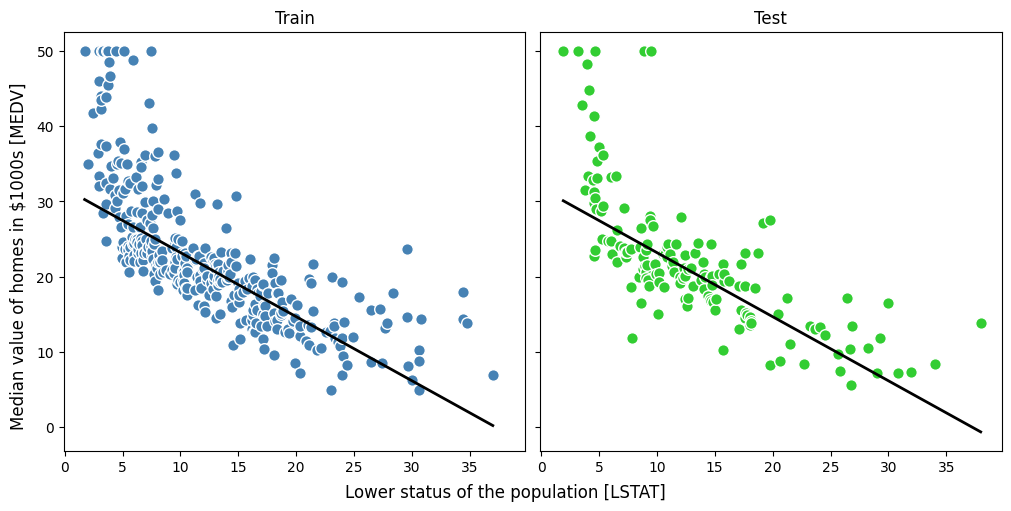

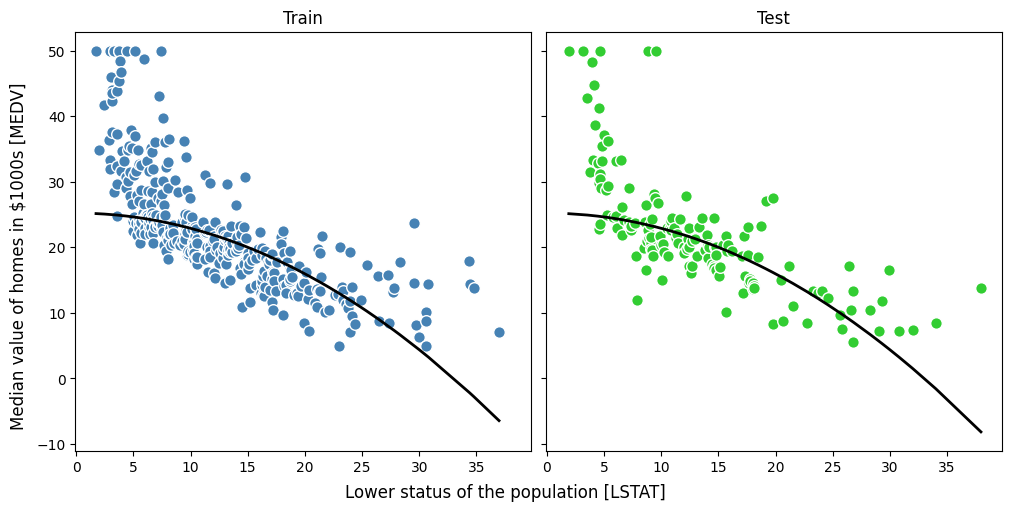

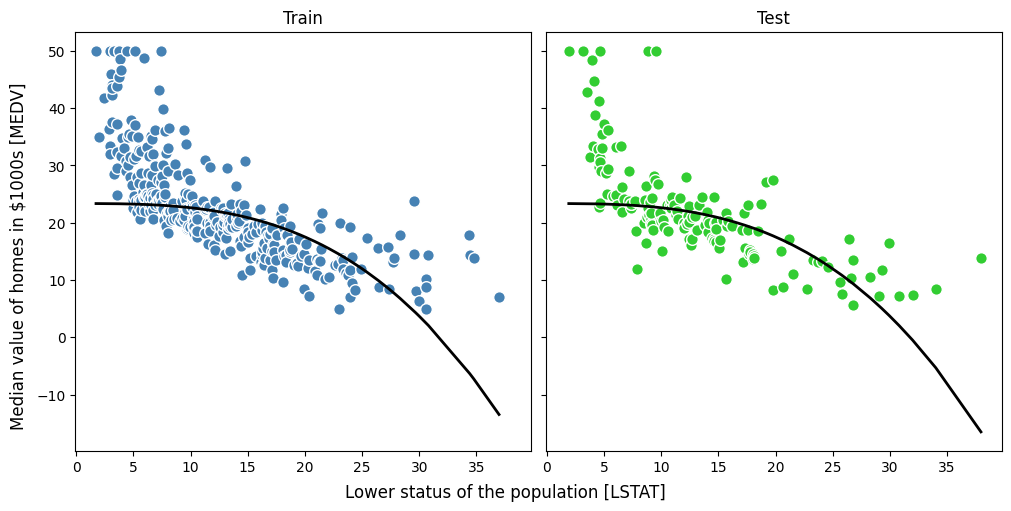

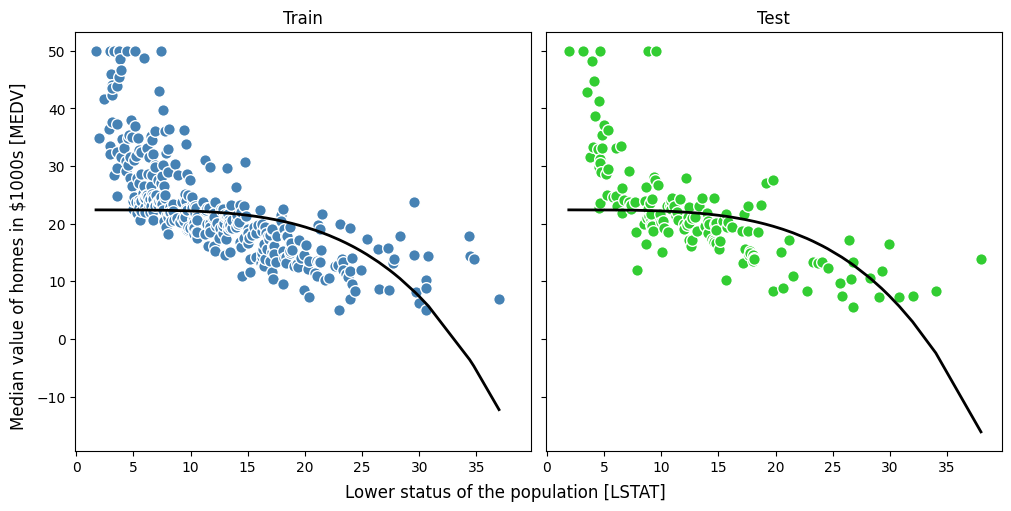

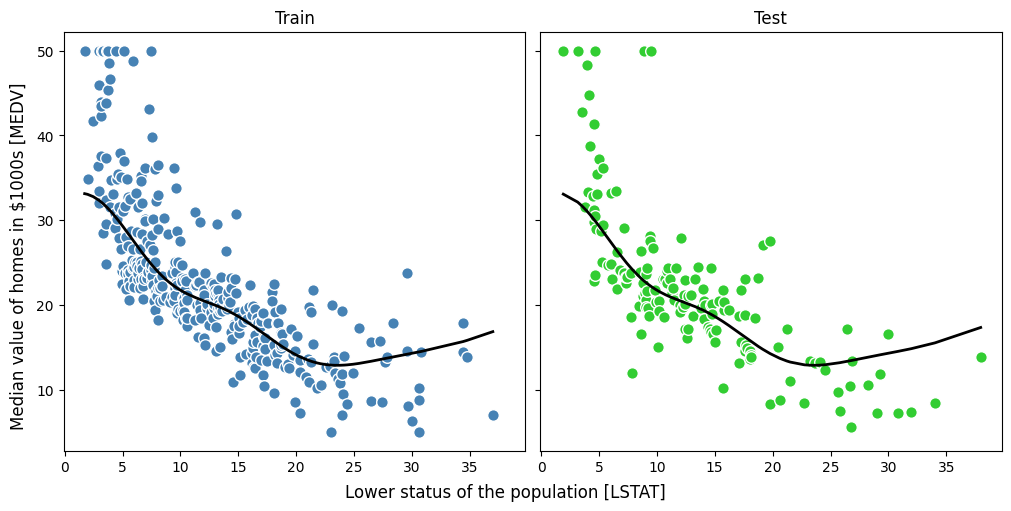

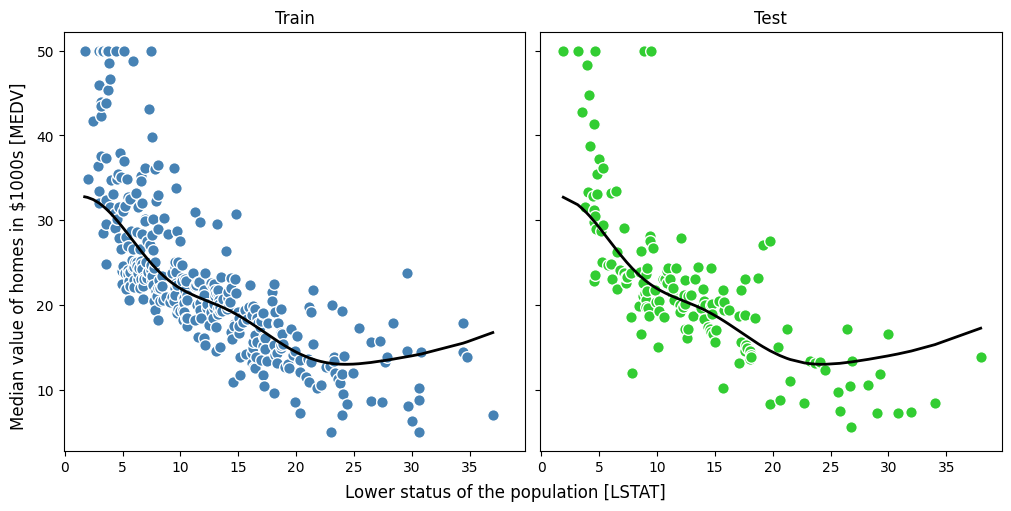

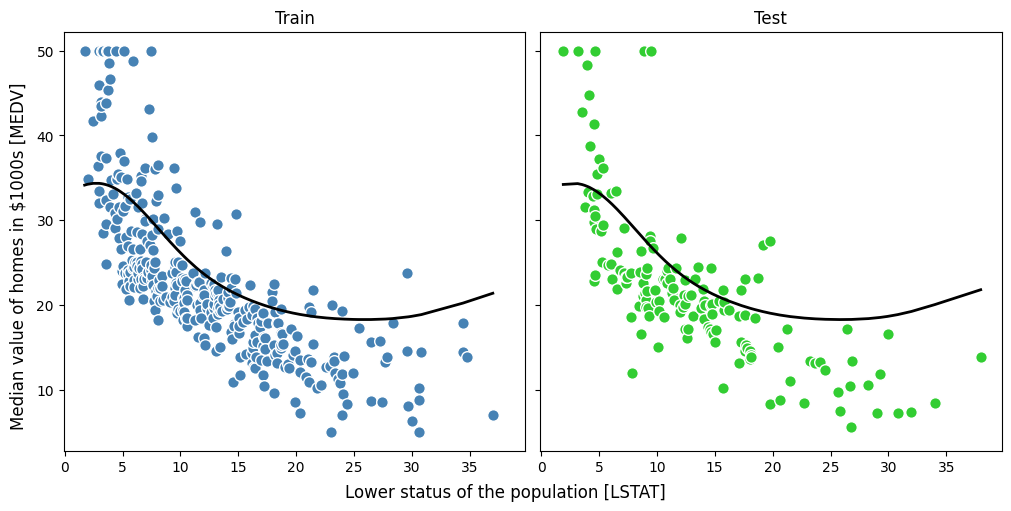

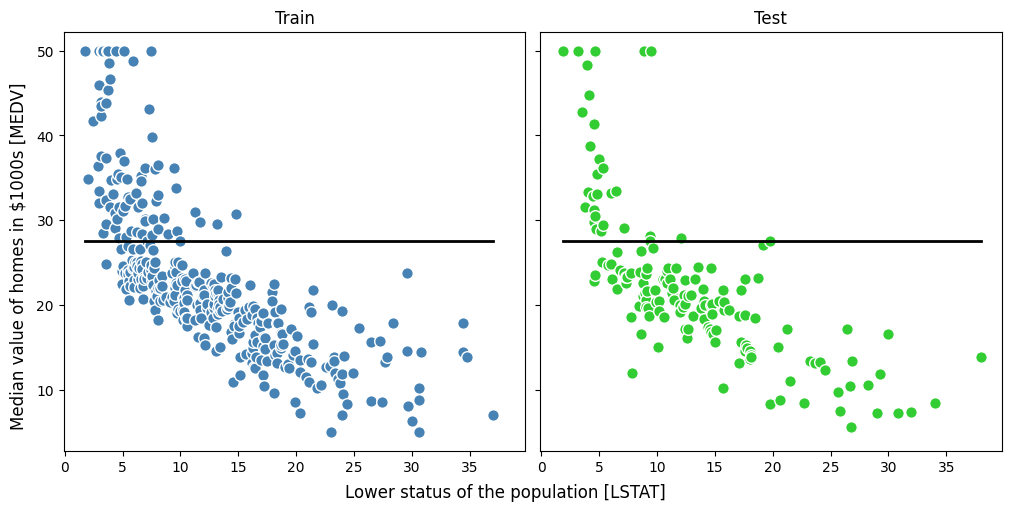

In [5]:
results = []

for name, values in paramSet.items():
    # Create model
    model =  SVR(**values)

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Store results
    store_results(
        results=results,
        model_name=f"SVR-{name}",
        model=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=values,
    )

    # Plotting
    plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)